### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer
from feature_engine import outlier_removers as outr

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [3]:
df1 = pd.read_csv("bronxheat.csv")

In [4]:
df1

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,2340.0,46.0,0.90,2.0,6.5,10400.0,125.00,1.0,2.0,2628.0,2000.0,6.02,2458.0,65.0,85.0,BRONX
1,7858.0,112.0,1.13,2.0,6.5,10400.0,125.00,1.0,2.0,2628.0,2000.0,6.02,2458.0,69.0,89.0,BRONX
2,7858.0,85.0,3.08,2.0,6.5,2500.0,100.00,1.0,5.0,2628.0,6034.0,6.02,2458.0,70.0,89.0,BRONX
3,7858.0,70.0,3.08,2.0,6.5,1875.0,75.00,1.0,5.0,2628.0,6034.0,6.02,1719.0,89.0,100.0,BRONX
4,2340.0,46.0,0.90,2.0,6.5,10400.0,100.00,1.0,2.0,2628.0,2000.0,6.02,2458.0,65.0,85.0,BRONX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28982,2340.0,46.0,0.90,2.0,1.0,2701.0,106.25,1.0,2.0,2628.0,2000.0,0.50,2458.0,65.0,85.0,BRONX
28983,1666.0,30.0,0.38,2.0,1.0,4360.0,122.25,1.0,2.0,2628.0,1666.0,0.50,2458.0,60.0,80.0,BRONX
28984,1720.0,30.0,0.20,2.0,1.0,8400.0,112.00,1.0,2.0,2628.0,1720.0,0.50,2458.0,60.0,80.0,BRONX
28985,1512.0,28.0,0.39,2.0,1.0,3891.0,109.08,1.0,2.0,2628.0,1512.0,0.50,2458.0,60.0,80.0,BRONX


In [5]:
df2 = pd.read_csv("brooklynheat.csv")

In [6]:
df2

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,7983.0,48.0,1.06,2.0,2.0,2142.0,100.0,1.0,6.00,1802.0,6189.0,1.35,1375.0,80.0,95.0,BROOKLYN
1,2430.0,48.0,1.06,2.0,2.0,2142.0,100.0,1.0,2.00,1802.0,2060.0,1.35,1375.0,80.0,95.0,BROOKLYN
2,2430.0,48.0,1.06,2.0,2.0,5603.0,100.0,1.0,2.00,1802.0,2060.0,1.35,1375.0,80.0,95.0,BROOKLYN
3,2430.0,48.0,1.06,2.0,2.0,517.0,46.0,1.0,2.00,1802.0,2060.0,1.35,1375.0,80.0,95.0,BROOKLYN
4,2430.0,48.0,1.06,2.0,2.0,4293.0,100.0,1.0,2.00,1802.0,2060.0,1.35,1375.0,80.0,95.0,BROOKLYN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69357,2031.0,24.0,0.57,0.5,1.0,3570.0,52.5,1.0,1.75,1802.0,1251.0,0.60,1375.0,80.0,95.0,BROOKLYN
69358,1312.0,24.0,0.37,0.5,1.0,3570.0,52.5,1.0,2.00,1802.0,1312.0,0.60,1375.0,80.0,95.0,BROOKLYN
69359,1992.0,24.0,1.12,0.5,1.0,1785.0,52.5,1.0,2.00,1802.0,1368.0,0.60,1375.0,80.0,95.0,BROOKLYN
69360,1071.0,24.0,0.60,0.5,1.0,1785.0,52.5,1.0,1.75,1802.0,1071.0,0.60,1375.0,80.0,95.0,BROOKLYN


In [7]:
df3 = pd.read_csv("manhattanheat.csv")

In [8]:
df3

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,76036.25,77.0,0.22,6.0,1.0,16942.0,100.00,1.0,5.0,6072.0,7650.0,0.60,2320.0,88.0,120.0,MANHATTAN
1,9401.00,77.0,3.60,6.0,6.5,2523.0,100.00,1.0,5.0,6072.0,7650.0,4.00,2320.0,78.0,110.0,MANHATTAN
2,76036.25,183.0,0.83,3.4,10.0,16942.0,126.93,1.0,5.0,6072.0,7650.0,10.00,2320.0,101.0,120.0,MANHATTAN
3,7500.00,75.0,0.19,3.4,10.0,16942.0,126.93,1.0,1.0,6072.0,7650.0,10.00,2320.0,88.0,120.0,MANHATTAN
4,76036.25,77.0,10.35,6.0,14.0,16942.0,126.93,1.0,12.0,6072.0,7650.0,10.00,2320.0,18.0,50.0,MANHATTAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16556,9401.00,77.0,3.60,6.0,6.5,5000.0,102.50,1.0,5.0,6072.0,7650.0,3.44,2320.0,78.0,110.0,MANHATTAN
16557,37482.00,117.0,4.19,6.0,6.5,8950.0,126.93,1.0,6.0,6072.0,31531.0,3.44,2320.0,59.0,90.0,MANHATTAN
16558,76036.25,138.0,7.81,6.0,6.5,10000.0,126.93,1.0,10.0,6072.0,31531.0,3.44,2320.0,22.0,54.0,MANHATTAN
16559,9401.00,15.0,3.60,6.0,6.5,16942.0,126.93,1.0,1.0,6072.0,7650.0,4.00,2320.0,57.0,89.0,MANHATTAN


In [9]:
df4 = pd.read_csv("queensheat.csv")

In [10]:
df4

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,1760.0,39.0,0.61,2.0,5.0,9580.0,100.00,1.0,2.0,1680.0,1600.0,1.8,1500.0,71.0,85.0,QUEENS
1,5569.0,70.0,2.16,2.0,5.0,9580.0,100.00,2.0,4.0,1680.0,4584.0,1.8,1500.0,-7.0,7.0,QUEENS
2,5569.0,94.0,2.16,2.0,5.0,9580.0,100.00,1.0,4.0,1680.0,4584.0,1.8,1500.0,0.0,7.0,QUEENS
3,5569.0,75.0,0.34,2.0,5.0,9580.0,100.00,5.0,2.0,1680.0,1600.0,0.6,1500.0,48.0,62.0,QUEENS
4,1760.0,39.0,0.61,2.0,5.0,6310.0,51.18,1.0,2.0,1680.0,1600.0,0.6,1500.0,71.0,85.0,QUEENS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97808,1760.0,39.0,0.61,2.0,2.0,4375.0,60.00,1.0,2.0,1680.0,1600.0,0.9,1500.0,71.0,85.0,QUEENS
97809,1760.0,39.0,0.61,2.0,2.0,5642.0,100.00,1.0,2.0,1680.0,1600.0,0.9,1500.0,71.0,85.0,QUEENS
97810,1760.0,39.0,0.61,2.0,2.0,1350.0,50.00,1.0,2.0,1680.0,1600.0,0.9,1500.0,71.0,85.0,QUEENS
97811,1760.0,39.0,0.61,2.0,2.0,5100.0,90.00,1.0,2.0,1680.0,1600.0,0.9,1500.0,71.0,85.0,QUEENS


In [11]:
df5 = pd.read_csv("statenheat.csv")

In [12]:
df5

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,1360.0,40.0,0.54,1.0,1.0,2500.0,100.00,1.0,2.0,1915.0,1360.0,0.6,1681.0,1.0,16.0,STATEN ISLAND
1,2248.0,48.0,0.98,1.0,1.0,2287.0,94.44,1.0,2.0,1915.0,2248.0,0.6,1681.0,22.0,37.0,STATEN ISLAND
2,1350.0,30.0,0.60,1.0,1.0,2262.0,87.00,1.0,2.0,1915.0,1350.0,0.6,1681.0,20.0,35.0,STATEN ISLAND
3,1684.0,28.0,0.42,1.0,1.0,4000.0,100.00,1.0,2.0,1915.0,1684.0,0.6,1681.0,70.0,85.0,STATEN ISLAND
4,1440.0,44.5,0.56,1.0,1.0,2575.0,103.00,1.0,2.0,1915.0,1440.0,0.6,1681.0,30.0,45.0,STATEN ISLAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16001,2392.0,46.0,0.61,1.0,1.0,3935.0,95.00,1.0,2.0,1915.0,2392.0,0.5,1681.0,35.0,60.0,STATEN ISLAND
16002,1768.0,61.0,0.61,1.0,1.0,2875.0,125.00,1.0,2.0,1915.0,1768.0,0.6,1681.0,25.0,40.0,STATEN ISLAND
16003,1600.0,34.0,0.49,1.0,1.0,700.0,35.00,1.0,1.0,1915.0,1500.0,0.6,1681.0,75.0,90.0,STATEN ISLAND
16004,4342.0,38.0,0.90,1.0,1.0,4800.0,60.00,1.0,2.0,1915.0,4228.0,0.5,1681.0,2.0,17.0,STATEN ISLAND


In [13]:
df = pd.concat([df1,df2,df3,df4,df5],axis=0)

In [14]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,2340.0,46.0,0.90,2.0,6.5,10400.0,125.0,1.0,2.0,2628.0,2000.0,6.02,2458.0,65.0,85.0,BRONX
1,7858.0,112.0,1.13,2.0,6.5,10400.0,125.0,1.0,2.0,2628.0,2000.0,6.02,2458.0,69.0,89.0,BRONX
2,7858.0,85.0,3.08,2.0,6.5,2500.0,100.0,1.0,5.0,2628.0,6034.0,6.02,2458.0,70.0,89.0,BRONX
3,7858.0,70.0,3.08,2.0,6.5,1875.0,75.0,1.0,5.0,2628.0,6034.0,6.02,1719.0,89.0,100.0,BRONX
4,2340.0,46.0,0.90,2.0,6.5,10400.0,100.0,1.0,2.0,2628.0,2000.0,6.02,2458.0,65.0,85.0,BRONX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16001,2392.0,46.0,0.61,1.0,1.0,3935.0,95.0,1.0,2.0,1915.0,2392.0,0.50,1681.0,35.0,60.0,STATEN ISLAND
16002,1768.0,61.0,0.61,1.0,1.0,2875.0,125.0,1.0,2.0,1915.0,1768.0,0.60,1681.0,25.0,40.0,STATEN ISLAND
16003,1600.0,34.0,0.49,1.0,1.0,700.0,35.0,1.0,1.0,1915.0,1500.0,0.60,1681.0,75.0,90.0,STATEN ISLAND
16004,4342.0,38.0,0.90,1.0,1.0,4800.0,60.0,1.0,2.0,1915.0,4228.0,0.50,1681.0,2.0,17.0,STATEN ISLAND


In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,2340.0,46.0,0.90,2.0,6.5,10400.0,125.0,1.0,2.0,2628.0,2000.0,6.02,2458.0,65.0,85.0,BRONX
1,7858.0,112.0,1.13,2.0,6.5,10400.0,125.0,1.0,2.0,2628.0,2000.0,6.02,2458.0,69.0,89.0,BRONX
2,7858.0,85.0,3.08,2.0,6.5,2500.0,100.0,1.0,5.0,2628.0,6034.0,6.02,2458.0,70.0,89.0,BRONX
3,7858.0,70.0,3.08,2.0,6.5,1875.0,75.0,1.0,5.0,2628.0,6034.0,6.02,1719.0,89.0,100.0,BRONX
4,2340.0,46.0,0.90,2.0,6.5,10400.0,100.0,1.0,2.0,2628.0,2000.0,6.02,2458.0,65.0,85.0,BRONX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228724,2392.0,46.0,0.61,1.0,1.0,3935.0,95.0,1.0,2.0,1915.0,2392.0,0.50,1681.0,35.0,60.0,STATEN ISLAND
228725,1768.0,61.0,0.61,1.0,1.0,2875.0,125.0,1.0,2.0,1915.0,1768.0,0.60,1681.0,25.0,40.0,STATEN ISLAND
228726,1600.0,34.0,0.49,1.0,1.0,700.0,35.0,1.0,1.0,1915.0,1500.0,0.60,1681.0,75.0,90.0,STATEN ISLAND
228727,4342.0,38.0,0.90,1.0,1.0,4800.0,60.0,1.0,2.0,1915.0,4228.0,0.50,1681.0,2.0,17.0,STATEN ISLAND


In [17]:
df['Borough'].value_counts()

QUEENS           97813
BROOKLYN         69362
BRONX            28987
MANHATTAN        16561
STATEN ISLAND    16006
Name: Borough, dtype: int64

In [18]:
df = df.sample(frac=1)

In [19]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
86863,1485.0,45.0,0.46,2.0,2.0,3200.0,100.0,1.0,1.0,1802.0,990.0,0.90,1375.0,75.0,90.0,BROOKLYN
91744,1416.0,38.0,0.89,2.0,2.0,1600.0,100.0,1.0,2.0,1802.0,1416.0,0.90,1375.0,65.0,80.0,BROOKLYN
192500,1096.0,34.0,0.46,2.0,1.0,2400.0,100.0,2.0,2.5,1680.0,1096.0,0.60,1500.0,86.0,100.0,QUEENS
46522,2858.0,35.0,1.50,2.0,2.0,1900.0,100.0,1.0,3.0,1802.0,2142.0,2.00,1375.0,106.0,121.0,BROOKLYN
172379,2680.0,48.0,1.34,2.0,2.0,2000.0,100.0,1.0,3.0,1680.0,2680.0,0.90,1500.0,31.0,45.0,QUEENS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94050,1320.0,44.0,0.40,2.0,2.0,3300.0,100.0,1.0,1.0,1802.0,880.0,0.90,1375.0,50.0,65.0,BROOKLYN
153618,1406.0,37.0,0.64,2.0,1.0,2200.0,100.0,1.0,2.0,1680.0,1406.0,0.60,1500.0,56.0,70.0,QUEENS
147807,2562.0,48.0,0.47,2.0,1.0,5500.0,100.0,1.0,1.0,1680.0,1464.0,0.50,1500.0,56.0,70.0,QUEENS
37991,3633.0,50.0,1.54,2.0,2.0,2365.0,100.0,1.0,2.0,1802.0,2422.0,2.00,1375.0,85.0,100.0,BROOKLYN


In [20]:
df.reset_index(drop=True,inplace=True)

In [21]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,1485.0,45.0,0.46,2.0,2.0,3200.0,100.0,1.0,1.0,1802.0,990.0,0.90,1375.0,75.0,90.0,BROOKLYN
1,1416.0,38.0,0.89,2.0,2.0,1600.0,100.0,1.0,2.0,1802.0,1416.0,0.90,1375.0,65.0,80.0,BROOKLYN
2,1096.0,34.0,0.46,2.0,1.0,2400.0,100.0,2.0,2.5,1680.0,1096.0,0.60,1500.0,86.0,100.0,QUEENS
3,2858.0,35.0,1.50,2.0,2.0,1900.0,100.0,1.0,3.0,1802.0,2142.0,2.00,1375.0,106.0,121.0,BROOKLYN
4,2680.0,48.0,1.34,2.0,2.0,2000.0,100.0,1.0,3.0,1680.0,2680.0,0.90,1500.0,31.0,45.0,QUEENS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228724,1320.0,44.0,0.40,2.0,2.0,3300.0,100.0,1.0,1.0,1802.0,880.0,0.90,1375.0,50.0,65.0,BROOKLYN
228725,1406.0,37.0,0.64,2.0,1.0,2200.0,100.0,1.0,2.0,1680.0,1406.0,0.60,1500.0,56.0,70.0,QUEENS
228726,2562.0,48.0,0.47,2.0,1.0,5500.0,100.0,1.0,1.0,1680.0,1464.0,0.50,1500.0,56.0,70.0,QUEENS
228727,3633.0,50.0,1.54,2.0,2.0,2365.0,100.0,1.0,2.0,1802.0,2422.0,2.00,1375.0,85.0,100.0,BROOKLYN


### Data Visualization

### Univariate Data Exploration

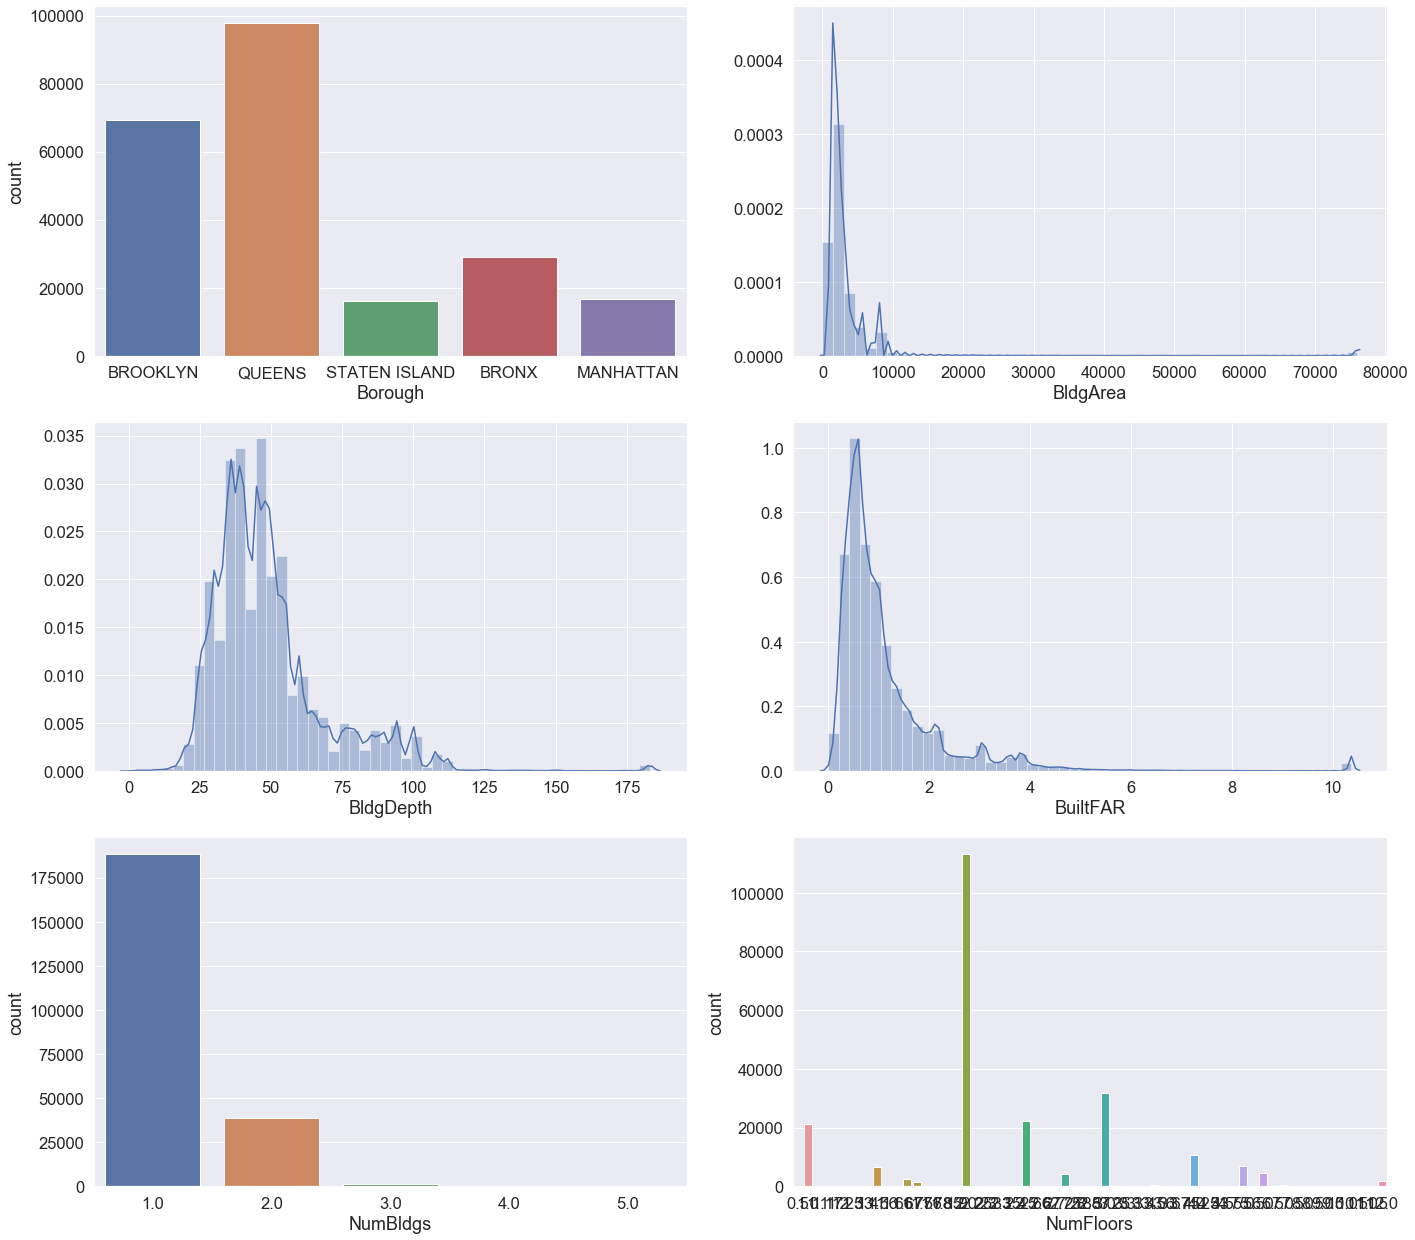

In [22]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(df.Borough)
plt.subplot(7,2,2)
sns.distplot(df.BldgArea)
plt.subplot(7,2,3)
sns.distplot(df.BldgDepth)
plt.subplot(7,2,4)
sns.distplot(df.BuiltFAR)
plt.subplot(7,2,5)
sns.countplot(df.NumBldgs)
plt.subplot(7,2,6)
sns.countplot(df.NumFloors)
# plt.subplot(7,2,7)
# sns.countplot(df.Age)
# plt.subplot(7,2,8)
# sns.countplot(df.Period)
# plt.subplot(7,2,9)
# sns.countplot()
# plt.subplot(7,2,10)
# sns.countplot()
# plt.subplot(7,2,11)
# sns.countplot()
# plt.subplot(7,2,12)
# sns.countplot()
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

### Bivariate Data Exploration

In [23]:
df.corr()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
BldgArea,1.000000,0.548052,0.776461,0.528264,0.535754,0.503635,0.126700,-0.101106,0.762724,0.534994,0.799592,0.570767,0.262815,-0.091566,-0.001572
BldgDepth,0.548052,1.000000,0.612713,0.379071,0.528142,0.357379,0.189556,-0.199758,0.477802,0.397322,0.499389,0.511473,0.176499,-0.095001,-0.015058
BuiltFAR,0.776461,0.612713,1.000000,0.626764,0.701978,0.166618,-0.043095,-0.216465,0.880528,0.623736,0.735076,0.748254,0.228629,-0.018745,0.088316
CommFAR,0.528264,0.379071,0.626764,1.000000,0.590242,0.102513,-0.007243,-0.074522,0.583635,0.836504,0.595185,0.630496,0.329276,0.095915,0.224691
FacilFAR,0.535754,0.528142,0.701978,0.590242,1.000000,0.120272,-0.042579,-0.234172,0.599314,0.624146,0.516636,0.894163,0.288674,0.044651,0.153842
LotArea,0.503635,0.357379,0.166618,0.102513,0.120272,1.000000,0.356037,0.095526,0.259847,0.163290,0.374659,0.119192,0.209768,-0.184193,-0.145295
LotDepth,0.126700,0.189556,-0.043095,-0.007243,-0.042579,0.356037,1.000000,0.064740,0.054119,0.029444,0.088809,-0.032428,0.121125,-0.024833,-0.018675
NumBldgs,-0.101106,-0.199758,-0.216465,-0.074522,-0.234172,0.095526,0.064740,1.000000,-0.108869,-0.183592,-0.114638,-0.223840,-0.144818,0.090397,0.053012
NumFloors,0.762724,0.477802,0.880528,0.583635,0.599314,0.259847,0.054119,-0.108869,1.000000,0.572071,0.745296,0.657680,0.237827,-0.032839,0.063694
OfficeArea,0.534994,0.397322,0.623736,0.836504,0.624146,0.163290,0.029444,-0.183592,0.572071,1.000000,0.593877,0.675041,0.550691,0.011405,0.160104


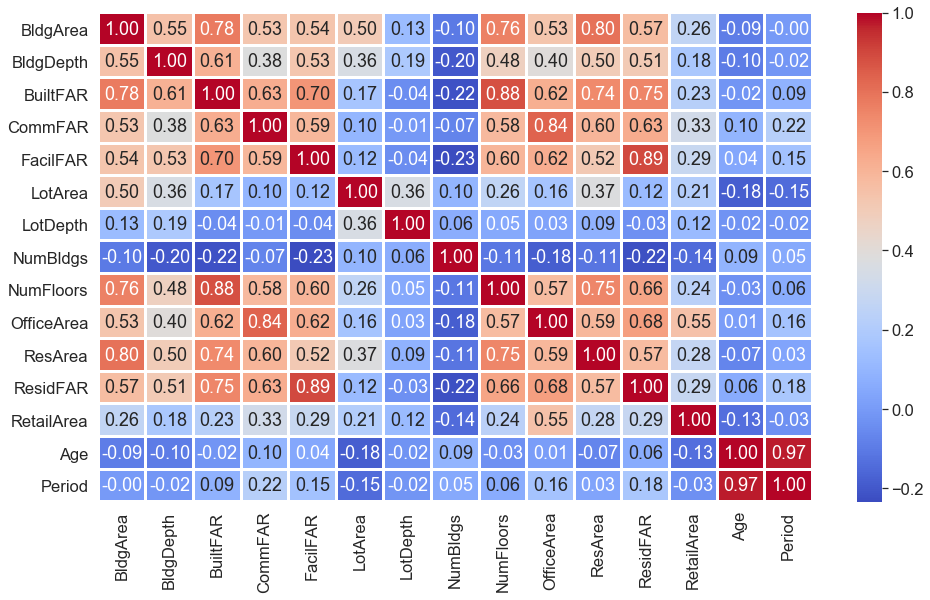

In [24]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

In [25]:
df['Borough'].value_counts()

QUEENS           97813
BROOKLYN         69362
BRONX            28987
MANHATTAN        16561
STATEN ISLAND    16006
Name: Borough, dtype: int64

In [26]:
encoder = LabelEncoder()

In [27]:
df['Borough'] = encoder.fit_transform(df['Borough'])

In [28]:
df['Borough'].value_counts()

3    97813
1    69362
0    28987
2    16561
4    16006
Name: Borough, dtype: int64

### BRONX = 0; BROOKLYN = 1; MANHATTAN = 2; QUEENS = 3; STATEN ISLAND = 4

In [29]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,1485.0,45.0,0.46,2.0,2.0,3200.0,100.0,1.0,1.0,1802.0,990.0,0.90,1375.0,75.0,90.0,1
1,1416.0,38.0,0.89,2.0,2.0,1600.0,100.0,1.0,2.0,1802.0,1416.0,0.90,1375.0,65.0,80.0,1
2,1096.0,34.0,0.46,2.0,1.0,2400.0,100.0,2.0,2.5,1680.0,1096.0,0.60,1500.0,86.0,100.0,3
3,2858.0,35.0,1.50,2.0,2.0,1900.0,100.0,1.0,3.0,1802.0,2142.0,2.00,1375.0,106.0,121.0,1
4,2680.0,48.0,1.34,2.0,2.0,2000.0,100.0,1.0,3.0,1680.0,2680.0,0.90,1500.0,31.0,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228724,1320.0,44.0,0.40,2.0,2.0,3300.0,100.0,1.0,1.0,1802.0,880.0,0.90,1375.0,50.0,65.0,1
228725,1406.0,37.0,0.64,2.0,1.0,2200.0,100.0,1.0,2.0,1680.0,1406.0,0.60,1500.0,56.0,70.0,3
228726,2562.0,48.0,0.47,2.0,1.0,5500.0,100.0,1.0,1.0,1680.0,1464.0,0.50,1500.0,56.0,70.0,3
228727,3633.0,50.0,1.54,2.0,2.0,2365.0,100.0,1.0,2.0,1802.0,2422.0,2.00,1375.0,85.0,100.0,1


In [30]:
#df.to_csv("boroughs.csv",index=False)

### Train Test Split

In [57]:
df = pd.read_csv("boroughs.csv")

In [58]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,2340.0,46.0,0.90,2.0,2.0,90.0,30.0,1.0,2.0,2628.0,2000.0,1.25,2458.0,65.0,85.0,0
1,2350.0,50.0,1.47,2.0,2.0,1600.0,80.0,1.0,2.0,1802.0,1880.0,1.35,1375.0,95.0,110.0,1
2,2162.0,42.0,0.66,2.0,1.0,3300.0,100.0,2.0,2.5,1680.0,2162.0,0.60,1500.0,86.0,100.0,3
3,1560.0,30.0,0.49,1.0,1.0,3160.0,79.0,1.0,2.0,1915.0,1560.0,0.60,1681.0,40.0,55.0,4
4,4100.0,55.0,2.05,2.0,4.8,2000.0,100.0,1.0,3.0,1802.0,2060.0,2.43,1375.0,75.0,90.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228724,3803.0,65.0,2.29,2.0,3.0,1658.0,85.0,1.0,3.0,1802.0,3803.0,3.00,1375.0,74.0,89.0,1
228725,2592.0,33.0,0.77,2.0,2.0,3358.0,73.0,1.0,2.0,2628.0,2592.0,0.90,2458.0,35.0,55.0,0
228726,2504.0,48.0,0.50,2.0,1.0,5000.0,100.0,1.0,2.5,1802.0,2504.0,0.60,1375.0,75.0,90.0,1
228727,7983.0,100.0,3.84,2.0,4.8,5603.0,100.0,1.0,6.0,1802.0,6189.0,2.43,1375.0,66.0,81.0,1


In [59]:
X = df.iloc[:,0:15]
y = df.iloc[:,15]

### Treat Imbalance Data

In [60]:
y.value_counts()

3    97813
1    69362
0    28987
2    16561
4    16006
Name: Borough, dtype: int64

In [61]:
ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [62]:
new_X, new_y = ros.fit_resample(X, y)

In [63]:
new_y.value_counts()

4    97813
3    97813
2    97813
1    97813
0    97813
Name: Borough, dtype: int64

In [64]:
new_X

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
0,2340.0,46.0,0.90,2.0,2.0,90.0,30.00,1.0,2.0,2628.0,2000.0,1.25,2458.0,65.0,85.0
1,2350.0,50.0,1.47,2.0,2.0,1600.0,80.00,1.0,2.0,1802.0,1880.0,1.35,1375.0,95.0,110.0
2,2162.0,42.0,0.66,2.0,1.0,3300.0,100.00,2.0,2.5,1680.0,2162.0,0.60,1500.0,86.0,100.0
3,1560.0,30.0,0.49,1.0,1.0,3160.0,79.00,1.0,2.0,1915.0,1560.0,0.60,1681.0,40.0,55.0
4,4100.0,55.0,2.05,2.0,4.8,2000.0,100.00,1.0,3.0,1802.0,2060.0,2.43,1375.0,75.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489060,2880.0,73.0,0.61,1.0,1.0,4717.0,89.00,1.0,1.0,1915.0,1500.0,0.60,1681.0,74.0,89.0
489061,1140.0,38.0,0.43,1.0,1.0,2660.0,87.00,1.0,2.0,1915.0,1140.0,0.60,1681.0,9.0,24.0
489062,1397.0,33.0,0.41,1.0,1.0,3420.0,57.00,1.0,2.0,1915.0,1397.0,0.60,1681.0,-3.0,12.0
489063,1389.0,27.0,0.44,1.0,1.0,3162.0,102.00,1.0,2.0,1915.0,1389.0,0.60,1681.0,85.0,100.0


In [65]:
new_X.values, new_y.values

(array([[ 2.340e+03,  4.600e+01,  9.000e-01, ...,  2.458e+03,  6.500e+01,
          8.500e+01],
        [ 2.350e+03,  5.000e+01,  1.470e+00, ...,  1.375e+03,  9.500e+01,
          1.100e+02],
        [ 2.162e+03,  4.200e+01,  6.600e-01, ...,  1.500e+03,  8.600e+01,
          1.000e+02],
        ...,
        [ 1.397e+03,  3.300e+01,  4.100e-01, ...,  1.681e+03, -3.000e+00,
          1.200e+01],
        [ 1.389e+03,  2.700e+01,  4.400e-01, ...,  1.681e+03,  8.500e+01,
          1.000e+02],
        [ 1.600e+03,  4.000e+01,  4.900e-01, ...,  1.681e+03,  3.500e+01,
          5.000e+01]]),
 array([0, 1, 3, ..., 4, 4, 4], dtype=int64))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(new_X.values, new_y.values, test_size=0.2, random_state=0)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((391252, 15), (97813, 15), (391252,), (97813,))

### Feature Scaling

In [68]:
X_train

array([[8.904e+03, 7.300e+01, 4.620e+00, ..., 1.700e+03, 7.300e+01,
        1.050e+02],
       [3.408e+03, 4.900e+01, 1.140e+00, ..., 2.458e+03, 9.000e+01,
        1.100e+02],
       [7.858e+03, 7.200e+01, 3.080e+00, ..., 2.458e+03, 8.500e+01,
        1.050e+02],
       ...,
       [3.160e+03, 3.800e+01, 6.300e-01, ..., 1.480e+03, 8.500e+01,
        1.000e+02],
       [3.800e+03, 1.000e+02, 1.000e+00, ..., 1.375e+03, 8.000e+01,
        9.500e+01],
       [2.934e+03, 5.000e+01, 1.000e+00, ..., 1.681e+03, 1.300e+01,
        2.800e+01]])

In [69]:
scaler = StandardScaler()

In [70]:
X_train_scaled = scaler.fit_transform(X_train)

In [71]:
X_test_scaled = scaler.transform(X_test)

In [72]:
X_train_scaled

array([[ 0.20709143,  0.82131321,  1.74121837, ..., -0.24790597,
         0.39857194,  0.79560536],
       [-0.21509179, -0.16633786, -0.22946134, ...,  1.39371073,
         0.96033231,  0.95568626],
       [ 0.12674142,  0.78016108,  0.86913597, ...,  1.39371073,
         0.79510867,  0.79560536],
       ...,
       [-0.23414227, -0.61901126, -0.51826785, ..., -0.72436464,
         0.79510867,  0.63552445],
       [-0.18497974,  1.93242066, -0.30874156, ..., -0.95176537,
         0.62988503,  0.47544355],
       [-0.25150279, -0.12518573, -0.30874156, ..., -0.28905467,
        -1.58411172, -1.66964058]])

In [73]:
X_test_scaled

array([[ 0.12674142,  2.42624619, -0.29175294, ...,  1.39371073,
        -0.49363571, -0.48504189],
       [-0.3136473 ,  2.42624619, -0.45031337, ...,  1.39371073,
        -0.19623316, -0.16488008],
       [-0.43263599, -0.70131552, -0.76743425, ..., -0.28905467,
         0.62988503,  0.47544355],
       ...,
       [-0.33584726, -0.86592403, -0.29741581, ...,  1.39371073,
        -0.52668044, -0.48504189],
       [ 5.36395274,  1.89126853,  4.99737018, ...,  1.0948412 ,
         0.20030357,  0.60350827],
       [-0.23721493, -0.04288148, -0.16716974, ..., -0.95176537,
         1.12555595,  0.95568626]])

In [74]:
y_train

array([2, 0, 0, ..., 4, 1, 4], dtype=int64)

In [75]:
y_test

array([0, 0, 4, ..., 0, 2, 1], dtype=int64)

### Model Training

### Using XGBoost (Scikit-Learn)

In [76]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=500, objective='multi:softmax')

In [77]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='merror',early_stopping_rounds=10)

[0]	validation_0-merror:0.002515
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.002495
[2]	validation_0-merror:0.002495
[3]	validation_0-merror:0.002495
[4]	validation_0-merror:0.002535
[5]	validation_0-merror:0.00227
[6]	validation_0-merror:0.00227
[7]	validation_0-merror:0.00227
[8]	validation_0-merror:0.00227
[9]	validation_0-merror:0.00227
[10]	validation_0-merror:0.000603
[11]	validation_0-merror:0.000573
[12]	validation_0-merror:0.000573
[13]	validation_0-merror:0.000603
[14]	validation_0-merror:0.000603
[15]	validation_0-merror:0.000603
[16]	validation_0-merror:0.000603
[17]	validation_0-merror:0.000603
[18]	validation_0-merror:0.00092
[19]	validation_0-merror:0.00092
[20]	validation_0-merror:0.00092
[21]	validation_0-merror:0.00092
Stopping. Best iteration:
[11]	validation_0-merror:0.000573



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [78]:
y_pred = xgbmodel.predict(X_test_scaled)

In [79]:
y_pred

array([0, 0, 4, ..., 0, 2, 1], dtype=int64)

### Model Evaluation

In [80]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[19512,    29,     0,    11,     3],
       [    0, 19614,     0,     4,     1],
       [    2,     2, 19532,     0,     0],
       [    0,     4,     0, 19585,     0],
       [    0,     0,     0,     0, 19514]], dtype=int64)

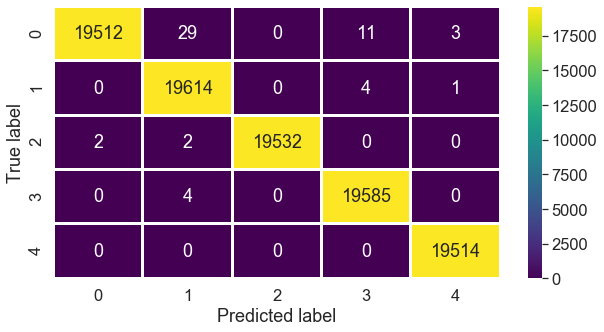

In [81]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.6g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19555
           1       1.00      1.00      1.00     19619
           2       1.00      1.00      1.00     19536
           3       1.00      1.00      1.00     19589
           4       1.00      1.00      1.00     19514

    accuracy                           1.00     97813
   macro avg       1.00      1.00      1.00     97813
weighted avg       1.00      1.00      1.00     97813



### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [83]:
X.columns

Index(['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'LotArea',
       'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
       'ResidFAR', 'RetailArea', 'Age', 'Period'],
      dtype='object')

In [84]:
xgbmodel.get_booster().feature_names = ['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'LotArea',
       'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea','ResidFAR', 'RetailArea', 'Age', 'Period']

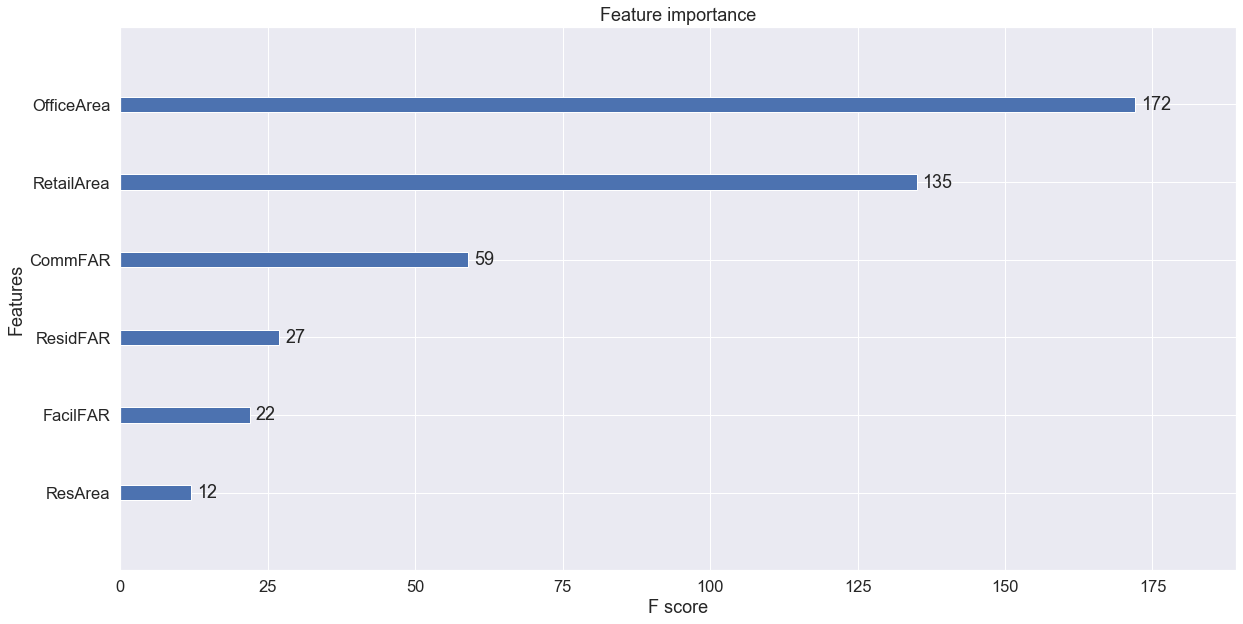

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

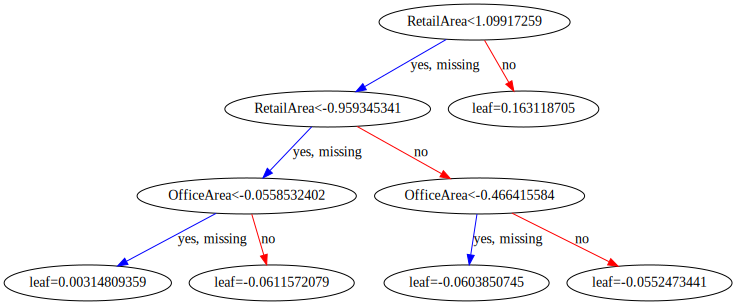

In [86]:
xgb.to_graphviz(xgbmodel,num_trees=10)

### Cross-Validation

In [87]:
# cv = cross_val_score(xgbmodel,X_train_scaled,y_train,cv=5,verbose=1,scoring='accuracy')

In [88]:
# cv.mean()

### Using XGBoost (API)

{'subsample': 0.7,
 'n_estimators': 700,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning rate': 0.11,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [89]:
dtrain = xgb.DMatrix(data=X_train_scaled,label=y_train)
dtest = xgb.DMatrix(data=X_test_scaled,label=y_test)

In [90]:
params = {'n_estimators': 700,
          'learning_rate': 0.11,
          'max_depth': 6,
          'min_child_weight': 1,
          'objective': 'multi:softmax',
          'num_class': 5 ,
          'seed': 0,
          'colsample_bytree': 0.8,
          'subsample' : 0.7,
          'gamma' : 0,
          'eval_metric':'merror'}

In [91]:
xgbmodel = xgb.train(params=params,dtrain=dtrain,num_boost_round=700,evals=[(dtest,"Test")],
                     early_stopping_rounds=10)

[0]	Test-merror:0.000808
Will train until Test-merror hasn't improved in 10 rounds.
[1]	Test-merror:0.000409
[2]	Test-merror:0.00044
[3]	Test-merror:0.000378
[4]	Test-merror:0.000409
[5]	Test-merror:0.000399
[6]	Test-merror:0.000368
[7]	Test-merror:0.000348
[8]	Test-merror:0.000337
[9]	Test-merror:0.000296
[10]	Test-merror:0.000307
[11]	Test-merror:0.000296
[12]	Test-merror:0.000235
[13]	Test-merror:0.000194
[14]	Test-merror:0.000164
[15]	Test-merror:0.000164
[16]	Test-merror:0.000153
[17]	Test-merror:0.000184
[18]	Test-merror:0.000174
[19]	Test-merror:0.000174
[20]	Test-merror:0.000153
[21]	Test-merror:0.000164
[22]	Test-merror:0.000153
[23]	Test-merror:0.000153
[24]	Test-merror:0.000153
[25]	Test-merror:0.000143
[26]	Test-merror:0.000143
[27]	Test-merror:0.000143
[28]	Test-merror:0.000143
[29]	Test-merror:0.000143
[30]	Test-merror:0.000143
[31]	Test-merror:0.000133
[32]	Test-merror:0.000133
[33]	Test-merror:0.000133
[34]	Test-merror:0.000102
[35]	Test-merror:0.000102
[36]	Test-merror

In [92]:
y_pred = xgbmodel.predict(dtest)

In [93]:
y_pred

array([0., 0., 4., ..., 0., 2., 1.], dtype=float32)

### Cross-Validation (API)

In [94]:
#  cv = xgb.cv(params=params,
#              dtrain=dtrain,
#              num_boost_round=600,
#              nfold=5,
#              stratified=False,
#              folds=None,
#              metrics=('merror'),
#              obj=None,
#              feval=None,
#              maximize=False,
#              early_stopping_rounds=10,
#              fpreproc=None,
#              as_pandas=True,
#              verbose_eval=None,
#              show_stdv=True,
#              seed=0,
#              callbacks=None,
#              shuffle=True,)

In [95]:
# cv

In [96]:
# cv['test-merror-mean'].min()

### Model Evaluation

In [97]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[19551,     1,     0,     3,     0],
       [    1, 19616,     0,     2,     0],
       [    0,     0, 19536,     0,     0],
       [    0,     2,     0, 19587,     0],
       [    0,     0,     0,     0, 19514]], dtype=int64)

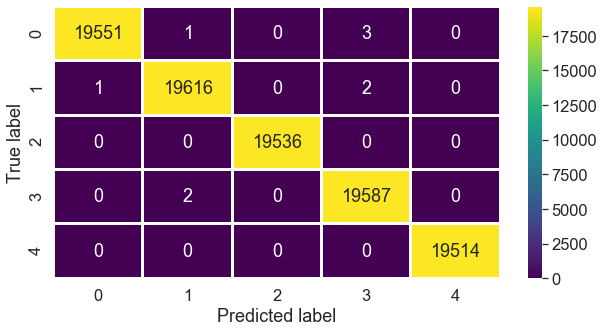

In [98]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.5g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19555
           1       1.00      1.00      1.00     19619
           2       1.00      1.00      1.00     19536
           3       1.00      1.00      1.00     19589
           4       1.00      1.00      1.00     19514

    accuracy                           1.00     97813
   macro avg       1.00      1.00      1.00     97813
weighted avg       1.00      1.00      1.00     97813



### Model Tuning

### Using RandomSearchCV

In [31]:
df = pd.read_csv("boroughs.csv", nrows=2000)

In [32]:
df

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period,Borough
0,2340.0,46.00,0.90,2.0,2.0,90.0,30.00,1.0,2.0,2628.0,2000.0,1.25,2458.0,65.0,85.0,0
1,2350.0,50.00,1.47,2.0,2.0,1600.0,80.00,1.0,2.0,1802.0,1880.0,1.35,1375.0,95.0,110.0,1
2,2162.0,42.00,0.66,2.0,1.0,3300.0,100.00,2.0,2.5,1680.0,2162.0,0.60,1500.0,86.0,100.0,3
3,1560.0,30.00,0.49,1.0,1.0,3160.0,79.00,1.0,2.0,1915.0,1560.0,0.60,1681.0,40.0,55.0,4
4,4100.0,55.00,2.05,2.0,4.8,2000.0,100.00,1.0,3.0,1802.0,2060.0,2.43,1375.0,75.0,90.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,762.0,67.33,0.78,2.0,4.8,975.0,105.81,1.0,1.0,2628.0,2000.0,3.44,762.0,90.0,110.0,0
1996,3657.0,53.00,0.98,2.0,2.0,3742.0,100.00,1.0,3.0,2628.0,3657.0,0.90,2458.0,80.0,100.0,0
1997,756.0,40.00,0.19,2.0,1.0,4000.0,80.00,1.0,1.0,1680.0,756.0,0.60,1500.0,86.0,100.0,3
1998,7858.0,48.00,0.51,2.0,4.8,10400.0,125.00,1.0,2.0,2628.0,6034.0,2.43,2458.0,59.0,79.0,0


### BRONX = 0; BROOKLYN = 1; MANHATTAN = 2; QUEENS = 3; STATEN ISLAND = 4

### Train Test Split

In [33]:
X = df.iloc[:,0:15]
y = df.iloc[:,15]

In [34]:
y.value_counts()

3    861
1    594
0    250
2    153
4    142
Name: Borough, dtype: int64

In [35]:
ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [36]:
new_X, new_y = ros.fit_resample(X, y)

In [37]:
new_y.value_counts()

3    861
2    861
1    861
4    861
0    861
Name: Borough, dtype: int64

In [38]:
new_X

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,Age,Period
0,2340.0,46.0,0.90,2.0,2.0,90.0,30.0,1.0,2.0,2628.0,2000.0,1.25,2458.0,65.0,85.0
1,2350.0,50.0,1.47,2.0,2.0,1600.0,80.0,1.0,2.0,1802.0,1880.0,1.35,1375.0,95.0,110.0
2,2162.0,42.0,0.66,2.0,1.0,3300.0,100.0,2.0,2.5,1680.0,2162.0,0.60,1500.0,86.0,100.0
3,1560.0,30.0,0.49,1.0,1.0,3160.0,79.0,1.0,2.0,1915.0,1560.0,0.60,1681.0,40.0,55.0
4,4100.0,55.0,2.05,2.0,4.8,2000.0,100.0,1.0,3.0,1802.0,2060.0,2.43,1375.0,75.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,1215.0,26.0,0.39,1.0,1.0,3080.0,70.0,1.0,2.0,1915.0,1215.0,0.60,1681.0,80.0,95.0
4301,1648.0,50.0,0.30,1.0,1.0,5480.0,137.0,1.0,2.0,1915.0,1648.0,0.60,1681.0,35.0,50.0
4302,1648.0,50.0,0.30,1.0,1.0,5480.0,137.0,1.0,2.0,1915.0,1648.0,0.60,1681.0,35.0,50.0
4303,1015.0,28.0,0.26,1.0,1.0,3915.0,87.0,1.0,1.5,1915.0,1015.0,0.50,1681.0,60.0,75.0


In [39]:
new_X.values, new_y.values

(array([[2.340e+03, 4.600e+01, 9.000e-01, ..., 2.458e+03, 6.500e+01,
         8.500e+01],
        [2.350e+03, 5.000e+01, 1.470e+00, ..., 1.375e+03, 9.500e+01,
         1.100e+02],
        [2.162e+03, 4.200e+01, 6.600e-01, ..., 1.500e+03, 8.600e+01,
         1.000e+02],
        ...,
        [1.648e+03, 5.000e+01, 3.000e-01, ..., 1.681e+03, 3.500e+01,
         5.000e+01],
        [1.015e+03, 2.800e+01, 2.600e-01, ..., 1.681e+03, 6.000e+01,
         7.500e+01],
        [1.600e+03, 4.000e+01, 6.400e-01, ..., 1.681e+03, 1.000e+00,
         1.600e+01]]),
 array([0, 1, 3, ..., 4, 4, 4], dtype=int64))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(new_X.values, new_y.values, test_size=0.2, random_state=0)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3444, 15), (861, 15), (3444,), (861,))

In [42]:
X_train

array([[3.232e+03, 5.200e+01, 6.200e-01, ..., 2.458e+03, 8.000e+00,
        2.800e+01],
       [2.118e+03, 5.000e+01, 1.050e+00, ..., 1.375e+03, 7.500e+01,
        9.000e+01],
       [1.280e+03, 3.400e+01, 4.100e-01, ..., 2.458e+03, 5.500e+01,
        7.500e+01],
       ...,
       [3.120e+03, 6.000e+01, 6.200e-01, ..., 2.458e+03, 6.900e+01,
        8.900e+01],
       [1.817e+03, 3.800e+01, 7.700e-01, ..., 2.458e+03, 8.000e+01,
        9.500e+01],
       [1.575e+03, 3.500e+01, 1.050e+00, ..., 1.375e+03, 1.060e+02,
        1.210e+02]])

In [43]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)

In [45]:
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled

array([[-0.23635873, -0.0508222 , -0.50380373, ...,  1.3736109 ,
        -1.8713346 , -1.77606641],
       [-0.31725747, -0.12542455, -0.26854928, ..., -0.94398386,
         0.40580271,  0.26428388],
       [-0.37811307, -0.72224335, -0.61869543, ...,  1.3736109 ,
        -0.27393977, -0.22934925],
       ...,
       [-0.24449217,  0.2475872 , -0.50380373, ...,  1.3736109 ,
         0.20187996,  0.231375  ],
       [-0.3391161 , -0.57303865, -0.42173822, ...,  1.3736109 ,
         0.57573833,  0.42882826],
       [-0.35669016, -0.68494218, -0.26854928, ..., -0.94398386,
         1.45940355,  1.28445902]])

In [47]:
X_test_scaled

array([[-0.24623506, -0.23732808, -0.02235276, ..., -0.94398386,
        -0.1719784 , -0.39389363],
       [-0.32451947, -0.46113513, -0.36702788, ..., -0.94398386,
         1.08554519,  0.92246139],
       [-0.38116312, -0.87144805, -0.67340577, ..., -0.67648677,
         0.77966107,  0.59337264],
       ...,
       [-0.37201299, -0.83414688, -0.08253413, ..., -0.28915099,
        -1.56545048, -1.64443091],
       [-0.24884938,  0.43409307, -0.24666514, ...,  1.07829412,
         0.16789284,  0.59337264],
       [-0.25901619, -0.0508222 , -0.0442369 , ..., -0.67648677,
        -0.74975951, -0.88752677]])

In [48]:
y_train

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [49]:
y_test

array([1, 1, 3, 4, 2, 4, 1, 3, 1, 1, 0, 2, 0, 3, 3, 3, 2, 4, 3, 0, 1, 2,
       3, 3, 4, 3, 2, 1, 2, 0, 0, 4, 3, 1, 0, 1, 4, 3, 4, 4, 4, 1, 3, 3,
       3, 2, 3, 4, 1, 0, 0, 1, 3, 1, 3, 1, 3, 1, 4, 2, 3, 1, 3, 2, 2, 0,
       1, 0, 0, 3, 4, 1, 4, 3, 4, 2, 1, 1, 2, 4, 1, 3, 4, 0, 3, 3, 4, 2,
       0, 1, 3, 1, 2, 4, 2, 2, 0, 2, 4, 1, 1, 2, 2, 1, 3, 4, 3, 2, 3, 0,
       2, 0, 1, 1, 1, 4, 3, 1, 1, 2, 0, 2, 1, 1, 4, 2, 1, 0, 4, 1, 2, 1,
       2, 1, 3, 4, 3, 0, 2, 3, 0, 4, 0, 0, 2, 4, 3, 4, 1, 0, 0, 2, 0, 3,
       1, 1, 1, 0, 2, 2, 2, 3, 2, 0, 0, 0, 0, 4, 2, 2, 1, 1, 2, 4, 2, 3,
       2, 3, 4, 2, 1, 3, 0, 0, 1, 0, 0, 2, 4, 4, 0, 3, 2, 3, 3, 0, 3, 4,
       0, 0, 0, 2, 3, 2, 3, 0, 2, 3, 4, 2, 3, 2, 3, 1, 2, 1, 4, 1, 1, 4,
       3, 4, 0, 2, 3, 4, 2, 4, 1, 3, 3, 0, 0, 0, 0, 3, 4, 2, 4, 2, 3, 3,
       1, 4, 2, 0, 3, 2, 3, 3, 4, 4, 0, 4, 0, 1, 2, 3, 2, 4, 4, 4, 3, 3,
       4, 1, 0, 2, 3, 1, 3, 0, 0, 3, 2, 0, 2, 4, 4, 0, 0, 1, 4, 1, 2, 4,
       2, 2, 0, 3, 1, 4, 0, 3, 0, 4, 1, 3, 1, 0, 1,

In [50]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='multi:softmax')

In [51]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [52]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='accuracy')

In [53]:
randm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softmax',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scal...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                

In [54]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7999999999999999, gamma=0,
              learning rate=0.11, learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=None, n_estimators=700,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.7, verbosity=1)

In [55]:
randm.best_score_

1.0

In [56]:
randm.best_params_

{'subsample': 0.7,
 'n_estimators': 700,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning rate': 0.11,
 'gamma': 0,
 'colsample_bytree': 0.7999999999999999}

{'subsample': 0.7,
 'n_estimators': 700,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning rate': 0.11,
 'gamma': 0,
 'colsample_bytree': 0.8}

### Save the Model

In [100]:
filename = 'modelboroughs.sav'
dump(xgbmodel,open(filename,'wb'))